In [7]:
import pandas as pd
import cv2
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import random

In [117]:
class Img():

  def __init__(self, path="", matrix=None, is_pb=True):

    if matrix is None:
      self.img = cv2.cvtColor(cv2.imread(f"imgs/{path}"), cv2.COLOR_BGR2GRAY) if is_pb else cv2.imread(f"imgs/{path}")
    else:
      self.img = matrix

    self.autovals = []
    self.gauss_img = np.zeros((self.img.shape[0], self.img.shape[1]), dtype=np.uint8)
    self.salt_img = np.array(self.img)
    self.U = []
    self.D = []
    self.Vt = []

  def show(self):
    plt.imshow(self.img, cmap='gray')
    plt.title('Imagem ')
    plt.show()

  def svd(self):
    self.U, self.D, self.Vt = np.linalg.svd(self.img, full_matrices=False)

  def reconstruct(self, rank, show=False):
    if self.U == [] or self.D == [] or self.Vt == []:
      self.svd()

    recon = np.dot(self.U[:, :rank], np.dot(np.diag(self.D[:rank]), self.Vt[:rank, :]))
    if show:
      plt.imshow(recon, cmap='gray')
      plt.title('Imagem reconstruída')
      plt.show()
    return recon

  def ruido_salt_n_pepper(self, taxa):

    """ Gera uma matriz de rand nas dimensoes da imagem e soma aos valores da representação matricial da imagem """

    altura, largura = self.img.shape
    nS_pixels =  random.randint(100, 100+taxa)
    nP_pixels =  random.randint(100, 100+taxa)
    i_1 = 0
    i_2 = 0

    for i in range(nS_pixels):
      y = random.randint(0, altura - 1)
      x = random.randint(0, largura - 1)

      self.salt_img[y][x] = 255

    for i in range(nP_pixels):
      y = random.randint(0, altura - 1)
      x = random.randint(0, largura - 1)
      self.salt_img[y][x] = 0
      i_1 = y
      i_2 = x

    return Img(matrix=self.salt_img)


  def ruido_gaussiano(self, taxa):

    """ Gera uma matriz de rand nas dimensoes da self e soma aos valores da representação matricial da self. """

    altura, largura = self.img.shape
    ruido =  np.random.rand(altura, largura) * taxa

    self.gauss_img = ruido + self.img

    return Img(matrix=self.gauss_img)

  def plot_auto_val(self, rank = True):
    if self.D == []:
      self.svd()

    if rank == True:
        rank = self.D.shape[0]
    self.autovals = [self.D[i] for i in range(rank)]

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(self.autovals)
    plt.yscale('log')
    #ax.plot(10, self.autovals[10], 'ro')
    plt.show()




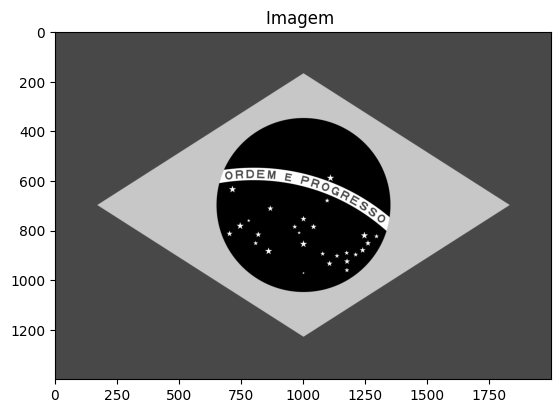

1400


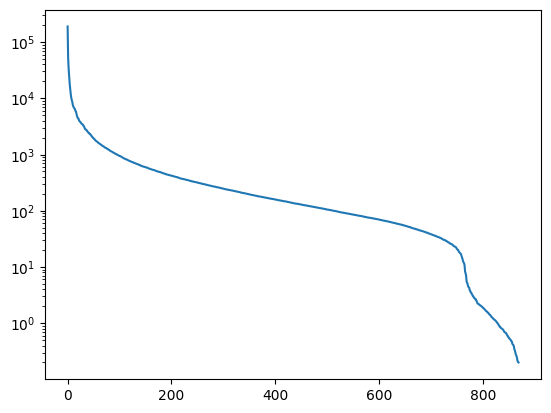

In [116]:
img = Img(path="brasil.png")

gauss = img.ruido_gaussiano(1000)
salt = img.ruido_salt_n_pepper(1000)

img.show()
img.plot_auto_val(870)

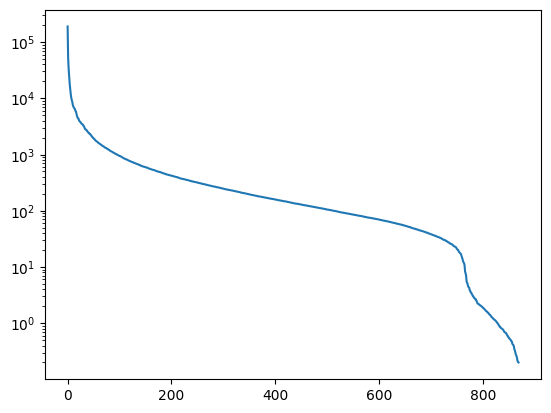